In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz



In [3]:
df = pd.read_csv("./precos_casa_california.csv")
df.head()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20445 entries, 0 to 20444
Data columns (total 10 columns):
longitude             20445 non-null object
latitude              20445 non-null float64
housing_median_age    20445 non-null object
total_rooms           20445 non-null object
total_bedrooms        20241 non-null object
population            20445 non-null object
households            20445 non-null object
median_income         20444 non-null float64
median_house_value    20445 non-null object
ocean_proximity       20445 non-null object
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


In [4]:

# inland 0
# 1h ocena 1 
# near bay 2
# near ocean 3
# Island 4

df = df.replace('INLAND', 0)
df = df.replace('<1H OCEAN', 1)
df = df.replace('NEAR BAY', 2)
df = df.replace('NEAR OCEAN', 3)
df = df.replace('ISLAND', 4)



In [5]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df = df.dropna(axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20214 entries, 0 to 20444
Data columns (total 10 columns):
longitude             20214 non-null float64
latitude              20214 non-null float64
housing_median_age    20214 non-null float64
total_rooms           20214 non-null float64
total_bedrooms        20214 non-null float64
population            20214 non-null float64
households            20214 non-null float64
median_income         20214 non-null float64
median_house_value    20214 non-null float64
ocean_proximity       20214 non-null float64
dtypes: float64(10)
memory usage: 1.7 MB


In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2.0
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,2.0
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,2.0
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,2.0
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,2.0


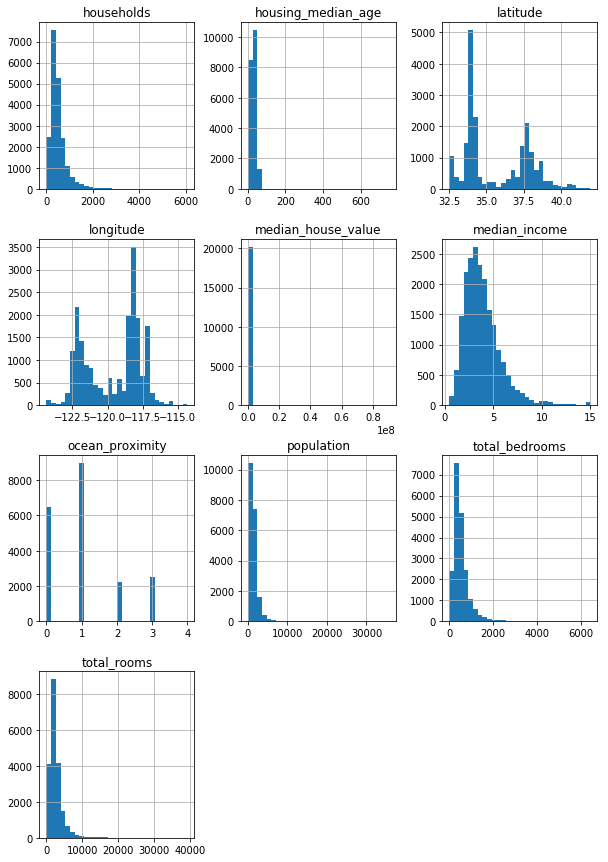

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(10,15))
plt.show()

In [8]:
df = df.drop(columns=['latitude', 'longitude'])

In [9]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2.0
2,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,2.0
3,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,2.0
4,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,2.0
5,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,2.0


In [10]:
dfout = df
cleanCols = dfout.columns
for i in cleanCols:
   dfout = dfout.loc[dfout[i] < dfout[i].quantile(0.95)]
dfout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12318 entries, 4 to 20443
Data columns (total 8 columns):
housing_median_age    12318 non-null float64
total_rooms           12318 non-null float64
total_bedrooms        12318 non-null float64
population            12318 non-null float64
households            12318 non-null float64
median_income         12318 non-null float64
median_house_value    12318 non-null float64
ocean_proximity       12318 non-null float64
dtypes: float64(8)
memory usage: 866.1 KB


In [11]:
features = list(dfout.columns[0:8])
features
x = dfout[features]

# y_name = dfout['median_house_value']
x = dfout.drop(columns=['median_house_value'])
y = dfout['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
# Create linear regression object
regr = GradientBoostingRegressor()

# Train the model using the training sets
model = regr.fit(x_train, y_train)

# Make predictions using the testing set
# y_pred = regr.predict(x_test)

# score
score = model.score(x_test, y_test)
print(score)

NameError: name 'GradientBoostingRegressor' is not defined

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
features = list(dfout.columns[0:8])
features
x = dfout[features]

# y_name = dfout['median_house_value']
x = dfout.drop(columns=['median_house_value'])
y = dfout['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
# Create linear regression object
regr = GradientBoostingRegressor()

# Train the model using the training sets
model = regr.fit(x_train, y_train)

# Make predictions using the testing set
# y_pred = regr.predict(x_test)

# score
score = model.score(x_test, y_test)
print round(score*100), '%'

65.0 %
